# Purdue Project

http://www.stat.purdue.edu/~lfindsen/stat512/Project.pdf

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical computation library

# Display up to 90 columns of a dataframe
pd.set_option('display.max_columns', 90)

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df = pd.read_table("./data/APPENC07.DAT.txt",header=None,
                   names=['id' ,'cost' ,'sqft' ,'bed' ,'bath' ,'ac' ,'garage' ,'pool' ,'year' ,'quality' ,'style' ,'lot' ,'highway'],delim_whitespace=True)
df.head()

,id,cost,sqft,bed,bath,ac,garage,pool,year,quality,style,lot,highway
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0


Style as 11 different possible values, 1 - 11

In [3]:
dummy = pd.get_dummies(df['style'], prefix_sep='', prefix='style', drop_first=False)

df = pd.concat([df, dummy], axis = 1).drop(['style11'],axis=1)
df.head()

,id,cost,sqft,bed,bath,ac,garage,pool,year,quality,style,lot,highway,style1,style2,style3,style4,style5,style6,style7,style9,style10
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0,1,0,0,0,0,0,0,0,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0,1,0,0,0,0,0,0,0,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0,1,0,0,0,0,0,0,0,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0,1,0,0,0,0,0,0,0,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0,0,0,0,0,0,0,1,0,0


quality has 3 possible indices, 1, 2, 3 so two new variables need to be created
 qual1 = 1 if high quality and 0 else, qual2 = 1 if medium quality and 0 else
 low quality will be qual1 = qual2 = 0;

In [4]:
dummy = pd.get_dummies(df['quality'], prefix_sep='' ,prefix='qual', drop_first=False)

df = pd.concat([df, dummy], axis = 1).drop(['qual3'],axis=1)
df.head()

,id,cost,sqft,bed,bath,ac,garage,pool,year,quality,style,lot,highway,style1,style2,style3,style4,style5,style6,style7,style9,style10,qual1,qual2
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0,1,0,0,0,0,0,0,0,0,0,1
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0,1,0,0,0,0,0,0,0,0,0,1
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0,1,0,0,0,0,0,0,0,0,0,1
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0,1,0,0,0,0,0,0,0,0,0,1
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0,0,0,0,0,0,0,1,0,0,0,1


In [5]:
model = smf.ols(formula='cost ~ sqft + bed + bath + ac + garage + pool + \
                year  + qual1 +qual2 + style1 +style2+ style3+ style4+ style5+ style6+ \
                style7 + style9 + style10 + lot + highway',data = df).fit()
anova_ = sm.stats.anova_lm(model, typ=1)
print(anova_)
print(model.summary())

             df        sum_sq       mean_sq            F         PR(>F)
sqft        1.0  6.655486e+12  6.655486e+12  2032.275532  1.933498e-178
bed         1.0  2.761256e+10  2.761256e+10     8.431591   3.850302e-03
bath        1.0  1.427102e+11  1.427102e+11    43.577053   1.040578e-10
ac          1.0  3.341715e+10  3.341715e+10    10.204040   1.489584e-03
garage      1.0  2.001904e+11  2.001904e+11    61.128831   3.178752e-14
pool        1.0  1.231402e+08  1.231402e+08     0.037601   8.463245e-01
year        1.0  2.352098e+11  2.352098e+11    71.822105   2.643965e-16
qual1       1.0  6.954309e+11  6.954309e+11   212.352219   2.342116e-40
qual2       1.0  6.843097e+09  6.843097e+09     2.089563   1.489337e-01
style1      1.0  7.659424e+10  7.659424e+10    23.388313   1.764212e-06
style2      1.0  5.262454e+07  5.262454e+07     0.016069   8.991781e-01
style3      1.0  1.591563e+10  1.591563e+10     4.859891   2.794187e-02
style4      1.0  2.761823e+10  2.761823e+10     8.433321   3.846

__Conclusion__
before running __model selection__ we can utilize the OLS results to assist which variables may be important in the final model. Looking at the results, the lowest p-value variables include:
- sqft
- bed
- garage (see below for corrleation)
- year
- qual1
- style1 (see below for corrleation)
- lot
- highway


### Multiplecolinatiry
Since at least one of these is significant, we cannot determine if there is a problem with multicollinearity from this data.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(pd.DataFrame(model.model.exog_names,vif))
print("")
print("R2",model.rsquared)
print("R2 adjust",model.rsquared_adj)

                      0
26387.635090  Intercept
4.665851           sqft
1.733497            bed
3.204204           bath
1.407803             ac
1.669460         garage
1.093521           pool
2.092467           year
3.634799          qual1
2.568364          qual2
129.500965       style1
53.530914        style2
58.051869        style3
12.065327        style4
19.046556        style5
18.997775        style6
104.532065       style7
2.029639         style9
2.107590        style10
1.192550            lot
1.032620        highway

R2 0.8344529999526633
R2 adjust 0.8278443372761229


__VIF__ looks like there is a porble with style1-style7 and potentially `sqft`. __My conclusion is that the style information is contained in the other data__

Next we utilize the __correlation matrix__ to determine if there is a problem with __multicolinatiry__ by analyzing the correlation between the explainatory variables. Since we are only looking at multicolinatiry, we dont need to include `cost`

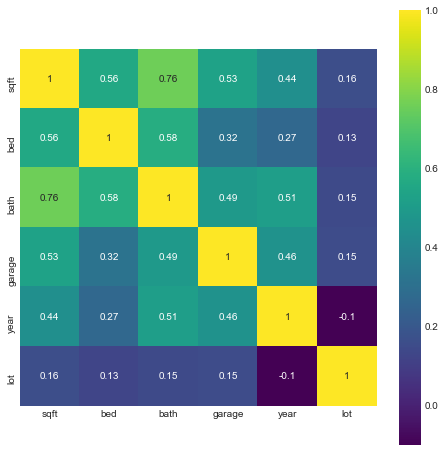

In [28]:
# only quanitiative variables (hard to tall if qualitative predictors are correlatied)
corr_matrix = df[['sqft','bed','bath','garage','year','lot']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')

- `sqft` appears to have the most correlated variables including `bed bath garage year lot`
- `bed` correlated items `bath sqft year garage`

scatter plot matrix from original data set

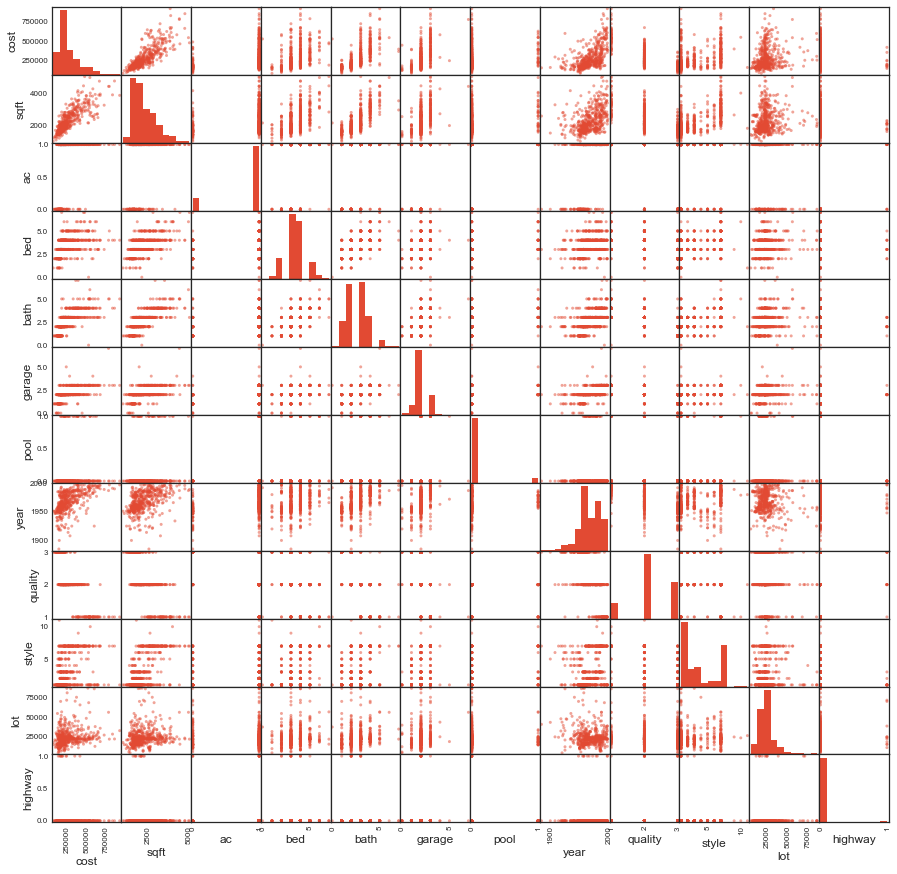

In [32]:
pd.plotting.scatter_matrix(df[['cost','sqft','ac','bed','bath','garage','pool','year','quality',
                  'style','lot', 'highway']], figsize=(15,15))
plt.show()

Looking at the heatmap it appears the following variables bay be potential features to look at. cost, sqft, bed, bath, garage, year, style lot

In [33]:
corr_matrix = df.corr()
corr_matrix['cost'].sort_values(ascending=False)

cost       1.000000
sqft       0.819470
qual1      0.746317
bath       0.683685
garage     0.577786
year       0.555516
bed        0.413324
style7     0.393081
style      0.357493
ac         0.288596
lot        0.224169
pool       0.146612
style10    0.086484
style9     0.038506
style6     0.003235
qual2     -0.033493
style5    -0.036251
highway   -0.050968
style4    -0.064235
style3    -0.081018
style2    -0.148491
style1    -0.178661
id        -0.558370
quality   -0.758078
Name: cost, dtype: float64

It looks like sqft, bed (maybe), bath, garage, year, qual1 are correlated, therefore ac, pool, qual2, styles, lot and highway
should be dropped.

#### partial regression plots 

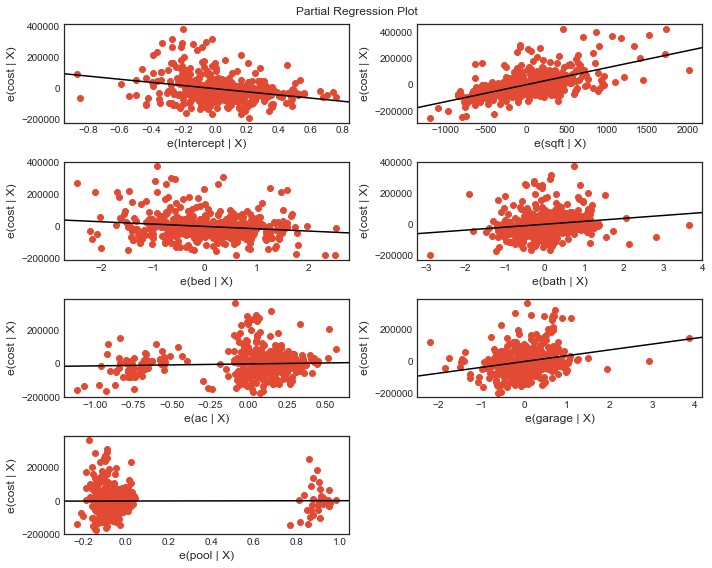

In [40]:
model = smf.ols(formula='cost ~ sqft + bed + bath + ac + garage + pool',data = df).fit()

# plot regression results
fig = plt.figure(figsize = (10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

- intercept - na
- sqft - definently significant
- bed - may/not sig
- bath may/not signif
- ac - not sig
- garage - may/not signif
- pool - prob not signf

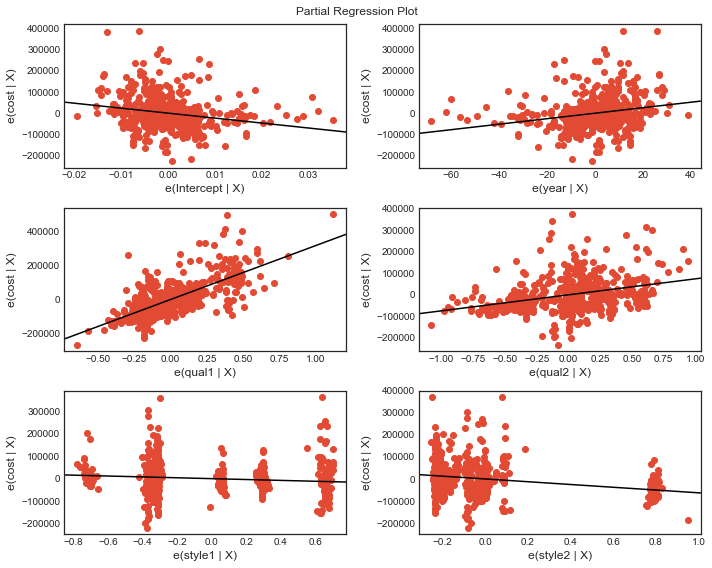

In [41]:
model = smf.ols(formula='cost ~ year  + qual1 +qual2 + style1 +style2',data = df).fit()

# plot regression results
fig = plt.figure(figsize = (10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

- year - significant
- qual1 - sign
- qual2 - not sign
- style1 style2 - curve due to outlier

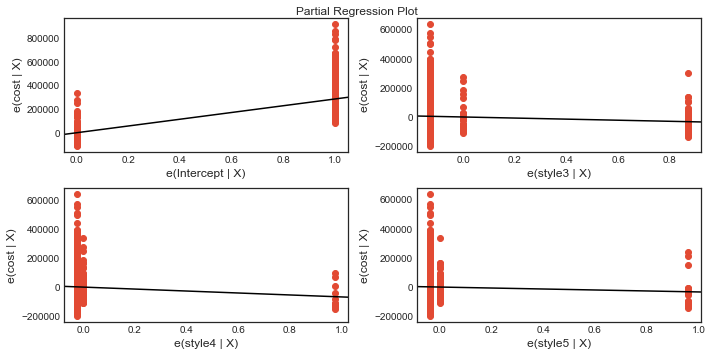

In [48]:
model = smf.ols(formula='cost ~ style3+ style4+ style5 +style3+ style4+ style5',data = df).fit()

# plot regression results
fig = plt.figure(figsize = (10,5))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

 - style3-5: curve due to outliers

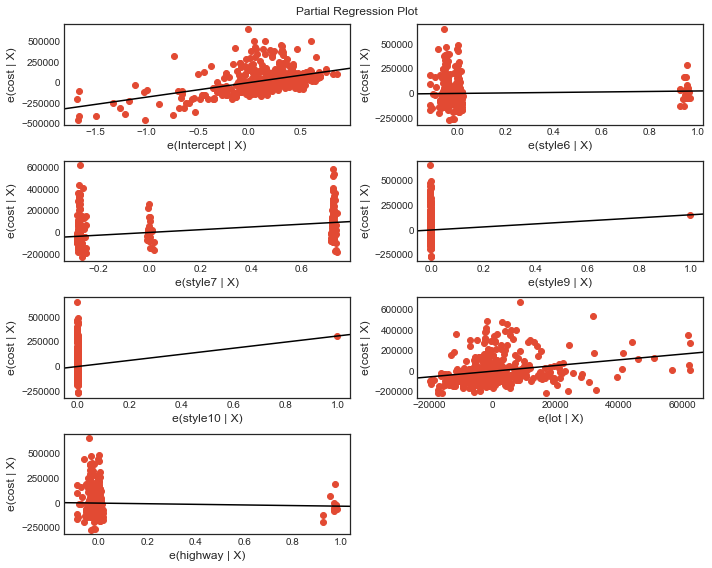

In [43]:
model = smf.ols(formula='cost ~  style6 + style7 + style9 + style10 + lot + highway',data = df).fit()

# plot regression results
fig = plt.figure(figsize = (10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

- style6 - 10: curve due to outliers
- highway - not sign
- lot - sign

## Model Selection
https://xavierbourretsicotte.github.io/subset_selection.html

In [6]:
import itertools
import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Best subset selection
To perform best selection, we fit separate models for each possible combination of the n predictors and then select the best subset. That is we fit:

- All models that contains exactly one predictor
- All models that contain 2 predictors at the second step: $\binom{n}{2}$
- Until reaching the end point where all n predictors are included in the model

#### Helper function for fitting linear regression (SKlearn)

In [7]:
def fit_linear_reg(X,Y):
    # https://xavierbourretsicotte.github.io/subset_selection.html
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

#### Implementing Best subset selection (using itertools.combinations)

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = df.cost
#X = df.drop(columns = 'Balance', axis = 1)
X = df[['sqft' ,'bed' ,'bath' ,'ac' ,'garage' ,'pool' ,'year' ,'qual1' ,'qual2' ,'style1',
        'style2' ,'style3' ,'style4' ,'style5' ,'style6' ,'style7' ,'style9' ,'style10' ,'lot' ,'highway']]
k = 20
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 20 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df_ = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [ ]:
df_.head()

In [ ]:
df_min = df_[df_.groupby('numb_features')['RSS'].transform(min) == df_['RSS']]
df_max = df_[df_.groupby('numb_features')['R_squared'].transform(max) == df_['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

#### Adding columns to the dataframe with RSS and R squared values of the best subset

In [ ]:
df_['min_RSS'] = df_.groupby('numb_features')['RSS'].transform(min)
df_['max_R_squared'] = df_.groupby('numb_features')['R_squared'].transform(max)
df_.head()

### Forward Stepwise Selection

In [ ]:
#Initialization variables
#Initialization variables
Y = df.cost
#X = df.drop(columns = 'Balance', axis = 1)
X = df[['sqft' ,'bed' ,'bath' ,'ac' ,'garage' ,'pool' ,'year' ,'qual1' ,'qual2' ,'style1',
        'style2' ,'style3' ,'style4' ,'style5' ,'style6' ,'style7' ,'style9' ,'style10' ,'lot' ,'highway']]
k = 20

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [ ]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

In [ ]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

### Computing the C_p, AIC, BIC and R-square adjusted

In [ ]:
#Initializing useful variables
m = len(Y)
p = 20
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

In [ ]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()